In [1]:
import numpy as np
import glob 
import os
from pyrex.tools import find_roots, find_intercept
from pyrex.basics import write_HDF5, read_HDF5
from pyrex.main import *
from pyrex.core import *
import matplotlib.pyplot as plt
import lal
import lalsimulation as ls

# all data

In [2]:
data_path = "/Users/yesety/Documents/AEI/projects/eccentric/catalog_ecc/"

name=[]
name.append(['SXS_BBH_0180','SXS_BBH_1355','SXS_BBH_1357','SXS_BBH_1358','SXS_BBH_1359','SXS_BBH_1360','SXS_BBH_1361','SXS_BBH_1362','SXS_BBH_1363'])
name.append(['SXS_BBH_0184','SXS_BBH_1364','SXS_BBH_1365','SXS_BBH_1366','SXS_BBH_1367','SXS_BBH_1368','SXS_BBH_1369'])
name.append(['SXS_BBH_0183','SXS_BBH_1372','SXS_BBH_1373','SXS_BBH_1374'])

e_comm=[]
e_comm.append([0,0.053,0.097,0.099,0.100,0.142,0.144,0.189,0.192])
e_comm.append([0,0.044,0.06,0.095,0.096,0.097,0.185])
e_comm.append([0,0.092,0.093,0.18]) #Hinder Phys Rev D 98 2018

l_comm=[]
l_comm.append([0.667,-2.788,1.371,-1.742,2.743,2.178,1.550,1.042,0.732])
l_comm.append([-0.604,2.144,1.938,1.013,-0.709,-1.963,-1.465])
l_comm.append([1.818,2.998,1.677,-0.265]) #Hinder Phys Rev D 98 201

q=[]
q.append(list(np.ones(len(e_comm[0]))+0))
q.append(list(np.ones(len(e_comm[1]))+1))
q.append(list(np.ones(len(e_comm[2]))+2))

data={}
data['name']=name[0]+name[1]+name[2]
data['e_comm']=e_comm[0]+e_comm[1]+e_comm[2]
data['q']=q[0]+q[1]+q[2]
data['l_comm']=l_comm[0]+l_comm[1]+l_comm[2]

# training & test data

In [3]:
data_training={}
data_training['name']=np.concatenate([data['name'][:3],data['name'][7:11],data['name'][14:17],data['name'][18:]])
data_training['e_comm']=np.concatenate([data['e_comm'][:3],data['e_comm'][7:11],data['e_comm'][14:17],data['e_comm'][18:]])
data_training['q']=np.concatenate([data['q'][:3],data['q'][7:11],data['q'][14:17],data['q'][18:]])
data_training['l_comm']=np.concatenate([data['l_comm'][:3],data['l_comm'][7:11],data['l_comm'][14:17],data['l_comm'][18:]])

data_test={}
for i in range(len(data['name'])):
    if data['name'][i] not in data_training['name']:
        data_test.setdefault('name', []).append(data['name'][i])
        data_test.setdefault('e_comm', []).append(data['e_comm'][i])
        data_test.setdefault('q', []).append(data['q'][i])
        data_test.setdefault('l_comm', []).append(data['l_comm'][i])

# save training data (automatically/only 1x)

In [4]:
training=Glassware(q=data_training['q'],chi=0,data_path=data_path,names=data_training['name'],e_ref=data_training['e_comm'])

# generate waveform from circular

In [5]:
approximant1='IMRPhenomD'
approximant2='SEOBNRv4'
spin1x=0.
spin1y=0.
spin1z=0.
spin2x=0.
spin2y=0.
spin2z=0.
mass1=25.
mass2=25.
eccentricity=data_test['e_comm'][1]
inclination=0.
distance=1.
coa_phase=0.
x=0.12

testPhenom=Cookware(approximant1,mass1,mass2,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,eccentricity,x,inclination,distance,coa_phase)
testSEOB=Cookware(approximant2,mass1,mass2,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,eccentricity,x,inclination,distance,coa_phase)

training data found: 
pyrexdata.pkl
training data found: 
pyrexdata.pkl


Text(0.5, 1.0, 'q= 1.0, e= 0.1')

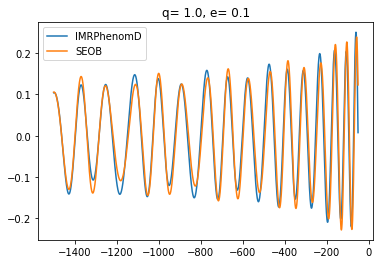

In [6]:
plt.plot(testPhenom.time,testPhenom.h22,label='IMRPhenomD')
plt.plot(testSEOB.time,testSEOB.h22,label='SEOB')
plt.legend()
plt.title('q= '+str(mass1/mass2)+ ', e= '+str(eccentricity))
